# 14. Linked List

**Q1. Given a linked list of N nodes such that it may contain a loop.
A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.
Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.**

Example 1:
Input:
N = 3
value[] = {1,3,4}
X = 2
Output:1

Explanation:The link list looks like
`1 -> 3 -> 4
     ^    |
     |____|`
A loop is present. If you remove it
successfully, the answer will be 1.

Example 2:
Input:
N = 4
value[] = {1,8,3,4}
X = 0
Output:1

Explanation:The Linked list does not
contains any loop.

Example 3:
Input:
N = 4
value[] = {1,2,3,4}
X = 1
Output:1

Explanation:The link list looks like
`1 -> 2 -> 3 -> 4
^              |
|______________|`
A loop is present.
If you remove it successfully,
the answer will be 1.

In [1]:
# Node class
class Node:

    # Constructor to initialize the node object
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:

    # Function to initialize head
    def __init__(self):
        self.head = None

    def detectAndRemoveLoop(self):
        slow_p = fast_p = self.head

        while(slow_p and fast_p and fast_p.next):
            slow_p = slow_p.next
            fast_p = fast_p.next.next

            # If slow_p and fast_p meet at some point then
            # there is a loop
            if slow_p == fast_p:
                self.removeLoop(slow_p)

                # Return 1 to indicate that loop is found
                return 1

        # Return 0 to indicate that there is no loop
        return 0

    # Function to remove loop
    # loop_node --> pointer to one of the loop nodes
    # head --> Pointer to the start node of the linked list
    def removeLoop(self, loop_node):
        ptr1 = loop_node
        ptr2 = loop_node
        
        # Count the number of nodes in loop
        k = 1
        while(ptr1.next != ptr2):
            ptr1 = ptr1.next
            k += 1

        # Fix one pointer to head
        ptr1 = self.head

        # And the other pointer to k nodes after head
        ptr2 = self.head
        for i in range(k):
            ptr2 = ptr2.next

        # Move both pointers at the same place
        # they will meet at loop starting node
        while(ptr2 != ptr1):
            ptr1 = ptr1.next
            ptr2 = ptr2.next

        # Get pointer to the last node
        while(ptr2.next != ptr1):
            ptr2 = ptr2.next

        # Set the next node of the loop ending node
        # to fix the loop
        ptr2.next = None

    # Function to insert a new node at the beginning
    def push(self, new_data):
        new_node = Node(new_data)
        new_node.next = self.head
        self.head = new_node

    # Utility function to print the LinkedList
    def printList(self):
        temp = self.head
        while(temp):
            print(temp.data, end = ' ')
            temp = temp.next


# Driver program
llist = LinkedList()
llist.push(10)
llist.push(4)
llist.push(15)
llist.push(20)
llist.push(50)

# Create a loop for testing
llist.head.next.next.next.next.next = llist.head.next.next

llist.detectAndRemoveLoop()

print("Linked List after removing loop")
llist.printList()

Linked List after removing loop
50 20 15 4 10 

**Q2. A number N is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.**

Example 1:
Input:
LinkedList: 4->5->6
Output:457

Example 2:
Input:
LinkedList: 1->2->3
Output:124

In [ ]:
import sys
import math

# Linked list node


class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

# Function to create a new node with given data */


def newNode(data):
    return Node(data)

# Function to reverse the linked list */


def reverseList(head):
    if not head:
        return
    curNode = head
    prevNode = head
    nextNode = head.next
    curNode.next = None

    while(nextNode):
        curNode = nextNode
        nextNode = nextNode.next
        curNode.next = prevNode
        prevNode = curNode

    return curNode

# Adds one to a linked lists and return the head
# node of resultant list


def addOne(head):

    # Reverse linked list and add one to head
    head = reverseList(head)
    k = head
    carry = 0
    prev = None
    head.data += 1

    # update carry for next calculation
    while(head != None) and (head.data > 9 or carry > 0):
        prev = head
        head.data += carry
        carry = head.data // 10
        head.data = head.data % 10
        head = head.next

    if carry > 0:
        prev.next = Node(carry)
    # Reverse the modified list
    return reverseList(k)

# A utility function to print a linked list


def printList(head):
    if not head:
        return
    while(head):
        print("{}".format(head.data), end="")
        head = head.next


# Driver code
if __name__ == '__main__':
    head = newNode(1)
    head.next = newNode(9)
    head.next.next = newNode(9)
    head.next.next.next = newNode(9)

    print("List is: ", end="")
    printList(head)

    head = addOne(head)

    print("\nResultant list is: ", end="")
    printList(head)

**Q3. Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a next pointer to the next node,(ii) a bottom pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. Note: The flattened list will be printed using the bottom pointer instead of next pointer.**

Example 1:
Input:
`5 -> 10 -> 19 -> 28
|     |     |     |
7     20    22   35
|           |     |
8          50    40
|                 |
30               45`
Output: `5-> 7-> 8- > 10 -> 19-> 20->
22-> 28-> 30-> 35-> 40-> 45-> 50.`

Explanation: The resultant linked lists has every node in a single level.(Note:| represents the bottom pointer.)

Example 2:
Input:
`5 -> 10 -> 19 -> 28
|          |
7          22
|          |
8          50
|
30`
Output: 5->7->8->10->19->22->28->30->50

Explanation: The resultant linked lists has every node in a single level.

(Note:| represents the bottom pointer.)

In [ ]:
class Node():
    def __init__(self, data):
        self.data = data
        self.right = None
        self.down = None


class LinkedList():
    def __init__(self):

        # head of list
        self.head = None

    # Utility function to insert a node at beginning of the
    # linked list
    def push(self, head_ref, data):

        # 1 & 2: Allocate the Node &
        # Put in the data
        new_node = Node(data)

        # Make next of new Node as head
        new_node.down = head_ref

        # 4. Move the head to point to new Node
        head_ref = new_node

        # 5. return to link it back
        return head_ref

    def printList(self):

        temp = self.head
        while(temp != None):
            print(temp.data, end=" ")
            temp = temp.down

        print()

    # An utility function to merge two sorted linked lists
    def merge(self, a, b):
        # if first linked list is empty then second
        # is the answer
        if(a == None):
            return b

        # if second linked list is empty then first
        # is the result
        if(b == None):
            return a

        # compare the data members of the two linked lists
        # and put the larger one in the result
        result = None

        if (a.data < b.data):
            result = a
            result.down = self.merge(a.down, b)
        else:
            result = b
            result.down = self.merge(a, b.down)

        result.right = None
        return result

    def flatten(self, root):

        # Base Case
        if(root == None or root.right == None):
            return root
        # recur for list on right

        root.right = self.flatten(root.right)

        # now merge
        root = self.merge(root, root.right)

        # return the root
        # it will be in turn merged with its left
        return root


# Driver's code
if __name__ == '__main__':
    L = LinkedList()

	'''
	Let us create the following linked list
			5 -> 10 -> 19 -> 28
			| |	 |	 |
			V V	 V	 V
			7 20 22 35
			|		 |	 |
			V		 V	 V
			8		 50 40
			|			 |
			V			 V
			30			 45
	'''
    L.head = L.push(L.head, 30)
    L.head = L.push(L.head, 8)
    L.head = L.push(L.head, 7)
    L.head = L.push(L.head, 5)

    L.head.right = L.push(L.head.right, 20)
    L.head.right = L.push(L.head.right, 10)

    L.head.right.right = L.push(L.head.right.right, 50)
    L.head.right.right = L.push(L.head.right.right, 22)
    L.head.right.right = L.push(L.head.right.right, 19)

    L.head.right.right.right = L.push(L.head.right.right.right, 45)
    L.head.right.right.right = L.push(L.head.right.right.right, 40)
    L.head.right.right.right = L.push(L.head.right.right.right, 35)
    L.head.right.right.right = L.push(L.head.right.right.right, 20)

    # Function call
    L.head = L.flatten(L.head)

    L.printList()

**Q4. You are given a special linked list with N nodes where each node has a next pointer pointing to its next node. You are also given M random pointers, where you will be given M number of pairs denoting two nodes a and b  i.e. a->arb = b (arb is pointer to random node).**

Construct a copy of the given list. The copy should consist of exactly N new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes X and Y in the original list, where X.arb --> Y, then for the corresponding two nodes x and y in the copied list, x.arb --> y.

Return the head of the copied linked list.

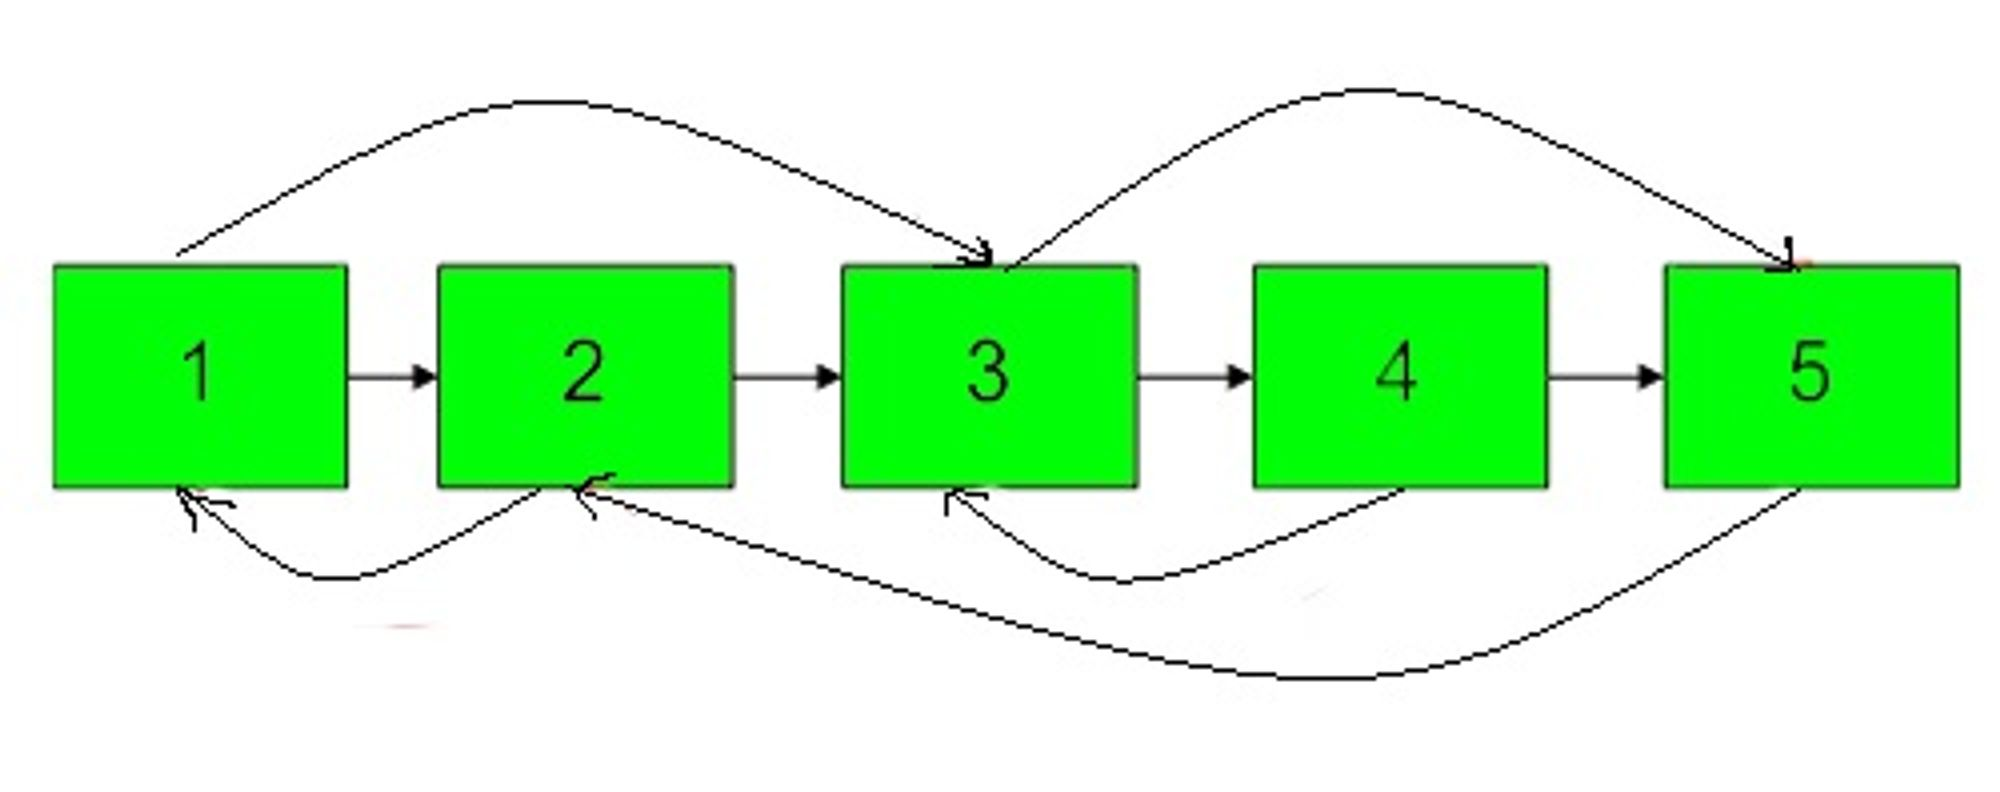
Note :- The diagram isn't part of any example, it just depicts an example of how the linked list may look like.

Example 1:
Input:
N = 4, M = 2
value = {1,2,3,4}
pairs = {{1,2},{2,4}}
Output:1

Explanation:In this test case, there are 4 nodes in linked list.  Among these 4 nodes,  2 nodes have arbitrary pointer set, rest two nodes have arbitrary pointer as NULL. Second line tells us the value of four nodes. The third line gives the information about arbitrary pointers. The first node arbitrary pointer is set to node 2.  The second node arbitrary pointer is set to node 4.

Example 2:
Input:
N = 4, M = 2
value[] = {1,3,5,9}
pairs[] = {{1,1},{3,4}}
Output:1

Explanation:In the given testcase, applying the method as stated in the above example, the output will be 1.

In [ ]:
# Structure of a node of linked list
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.arbit = None

# Function to clone the linked list
def cloneLinkedList(head):
    # Map to store the mapping of
    # old nodes with new ones
    mp = {}
    temp = head
    nhead = Node(temp.val)
    mp[temp] = nhead

    # Loop to create duplicates of nodes
    # with only next pointer
    while temp.next:
        nhead.next = Node(temp.next.val)
        temp = temp.next
        nhead = nhead.next
        mp[temp] = nhead

    temp = head

    # Loop to clone the arbit pointers
    while temp:
        mp[temp].arbit = mp[temp.arbit]
        temp = temp.next

    # Return the head of the clone
    return mp[head]

# Function to print the linked list
def printList(head):
    result = []
    while head:
        result.append(f"{head.val}({head.arbit.val})")
        head = head.next
    print(" -> ".join(result))

# Creating a linked list with random pointer
head = Node(1)
head.next = Node(2)
head.next.next = Node(3)
head.next.next.next = Node(4)
head.next.next.next.next = Node(5)
head.arbit = head.next.next
head.next.arbit = head
head.next.next.arbit = head.next.next.next.next
head.next.next.next.arbit = head.next.next
head.next.next.next.next.arbit = head.next

# Print the original list
print("The original linked list:")
printList(head)

# Function call
sol = cloneLinkedList(head)

print("The cloned linked list:")
printList(sol)

**Q5. Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return the reordered list.
The first node is considered odd, and the second node is even, and so on.
Note that the relative order inside both the even and odd groups should remain as it was in the input.
You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.**

Example 1:
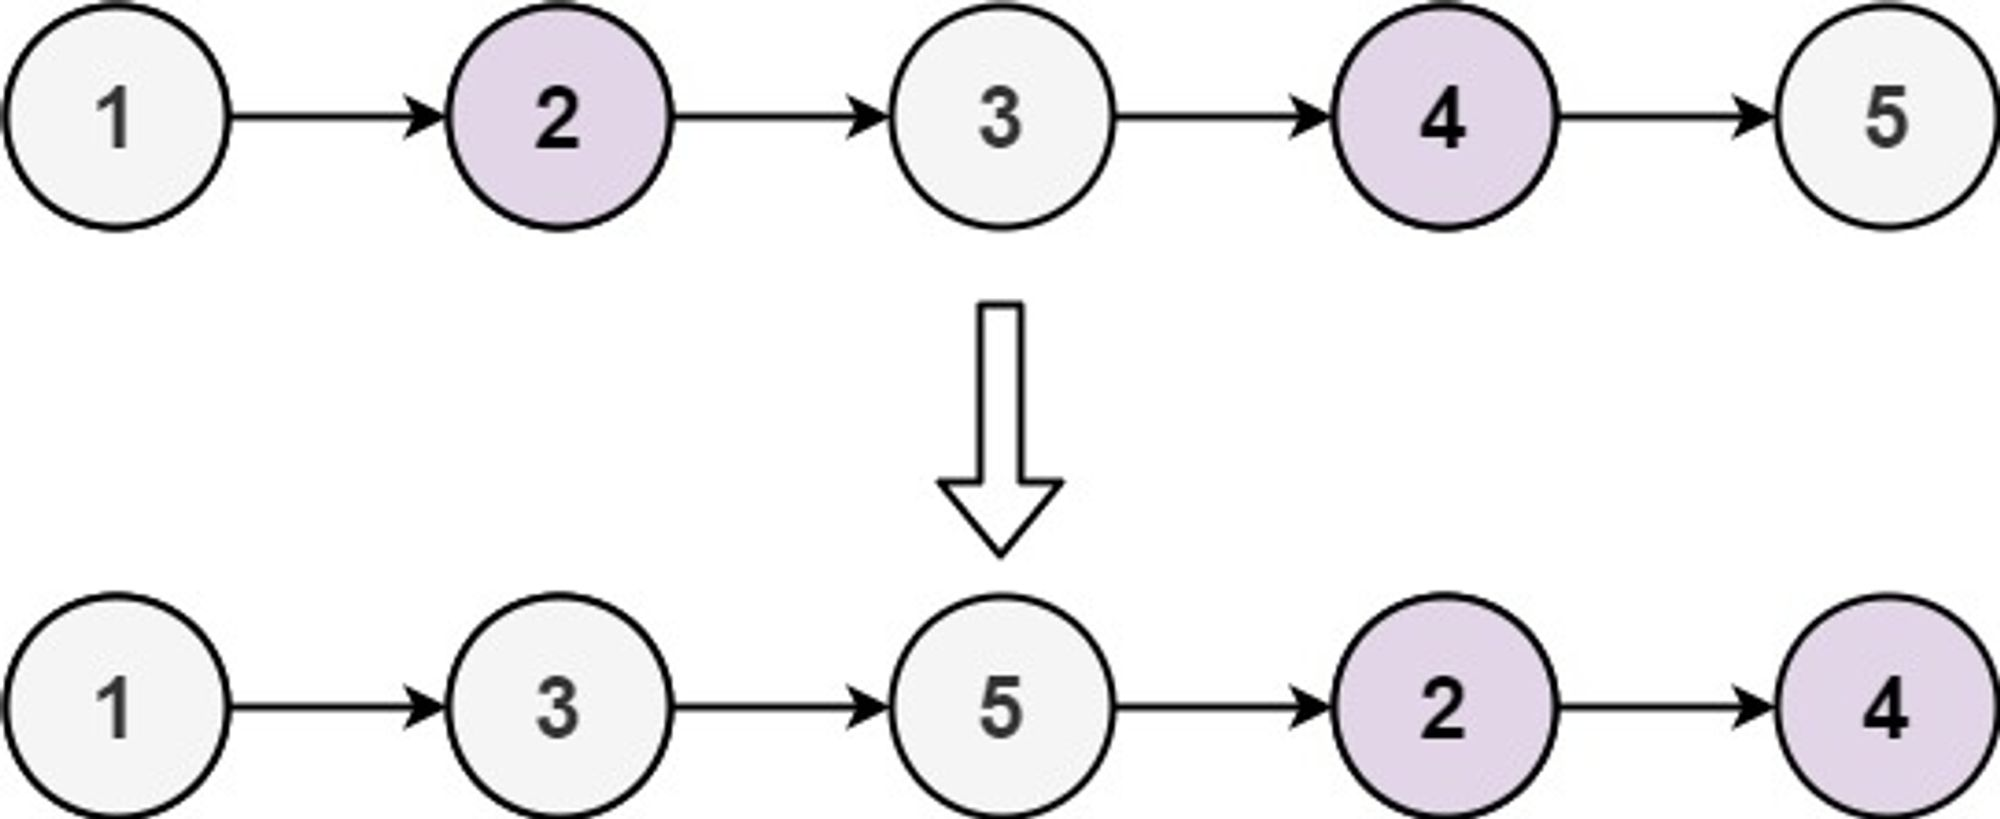

Input: head = [1,2,3,4,5]
Output: [1,3,5,2,4]

Example 2:
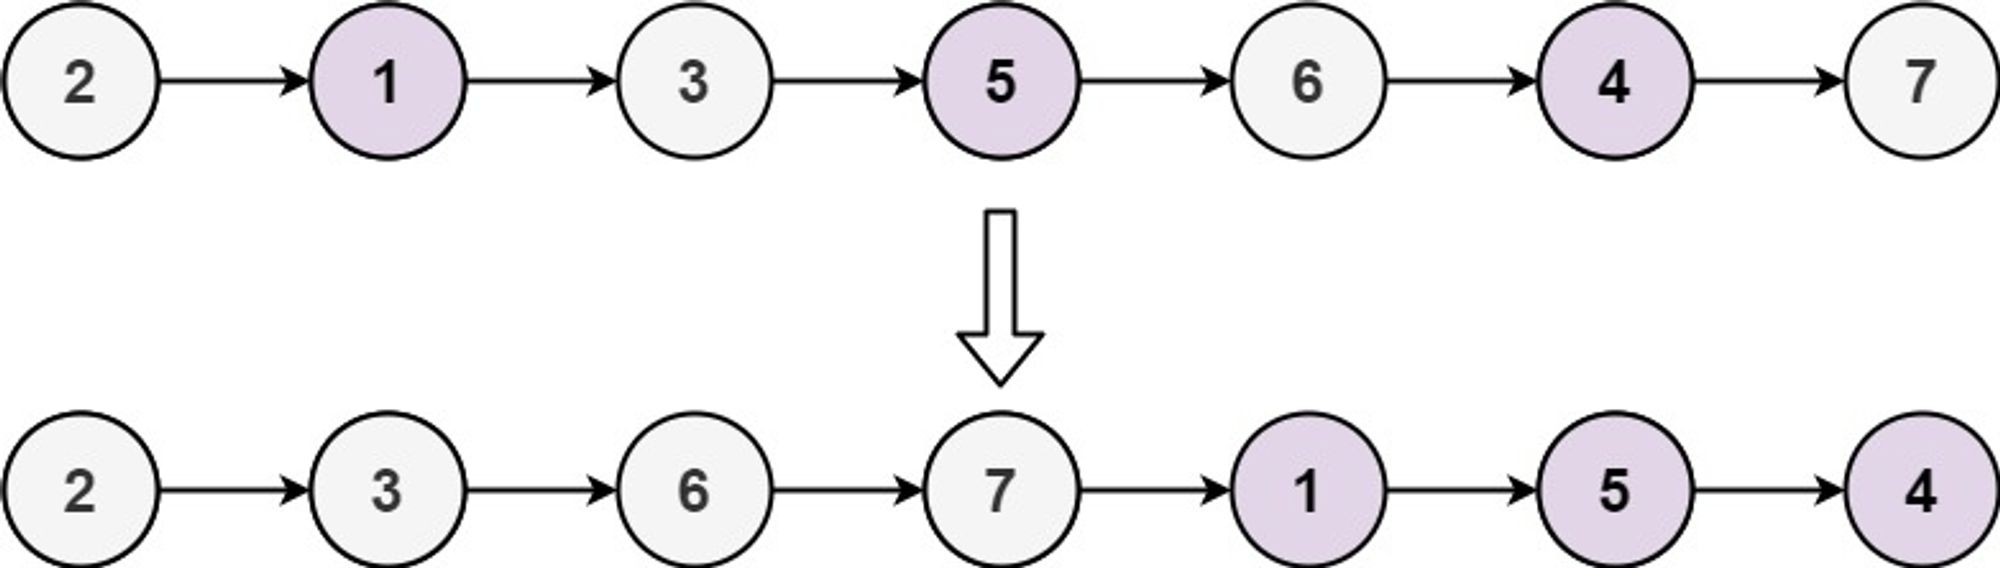

Input: head = [2,1,3,5,6,4,7]
Output: [2,3,6,7,1,5,4]

In [ ]:
# Linked List Node
class Node:
    def __init__(self, d):
        self.data = d
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None
        
    # A utility function to create
    # a new node
    def newNode(self, key):
        temp = Node(key)
        self.next = None
        return temp

    # Rearranges given linked list
    # such that all even positioned
    # nodes are before odd positioned.
    # Returns new head of linked List.
    def rearrangeEvenOdd(self, head):
        
        # Corner case
        if (self.head == None):
            return None

        # Initialize first nodes of
        # even and odd lists
        odd = self.head
        even = self.head.next

        # Remember the first node of even list so
        # that we can connect the even list at the
        # end of odd list.
        evenFirst = even

        while (1 == 1):
            
            # If there are no more nodes,
            # then connect first node of even
            # list to the last node of odd list
            if (odd == None or even == None or
                            (even.next) == None):
                odd.next = evenFirst
                break

            # Connecting odd nodes
            odd.next = even.next
            odd = even.next

            # If there are NO more even nodes
            # after current odd.
            if (odd.next == None):
                even.next = None
                odd.next = evenFirst
                break

            # Connecting even nodes
            even.next = odd.next
            even = odd.next
        return head

    # A utility function to print a linked list
    def printlist(self, node):
        while (node != None):
            print(node.data, end = "")
            print("->", end = "")
            node = node.next
    print ("NULL")

    # Function to insert a new node
    # at the beginning
    def push(self, new_data):
        new_node = Node(new_data)
        new_node.next = self.head
        self.head = new_node

# Driver code
ll = LinkedList()
ll.push(5)
ll.push(4)
ll.push(3)
ll.push(2)
ll.push(1)
print ("Given Linked List")
ll.printlist(ll.head)

start = ll.rearrangeEvenOdd(ll.head)

print ("\nModified Linked List")
ll.printlist(start)

**Q6. Given a singly linked list of size N. The task is to left-shift the linked list by k nodes, where k is a given positive integer smaller than or equal to length of the linked list.**

Example 1:
Input:
N = 5
value[] = {2, 4, 7, 8, 9}
k = 3
Output:8 9 2 4 7

Explanation:Rotate 1:4 -> 7 -> 8 -> 9 -> 2
Rotate 2: 7 -> 8 -> 9 -> 2 -> 4
Rotate 3: 8 -> 9 -> 2 -> 4 -> 7

Example 2:
Input:
N = 8
value[] = {1, 2, 3, 4, 5, 6, 7, 8}
k = 4
Output:5 6 7 8 1 2 3 4

**Q7. You are given the `head` of a linked list with `n` nodes.
For each node in the list, find the value of the next greater node. That is, for each node, find the value of the first node that is next to it and has a strictly larger value than it.
Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (1-indexed). If the `ith` node does not have a next greater node, set `answer[i] = 0`.**

Example 1:
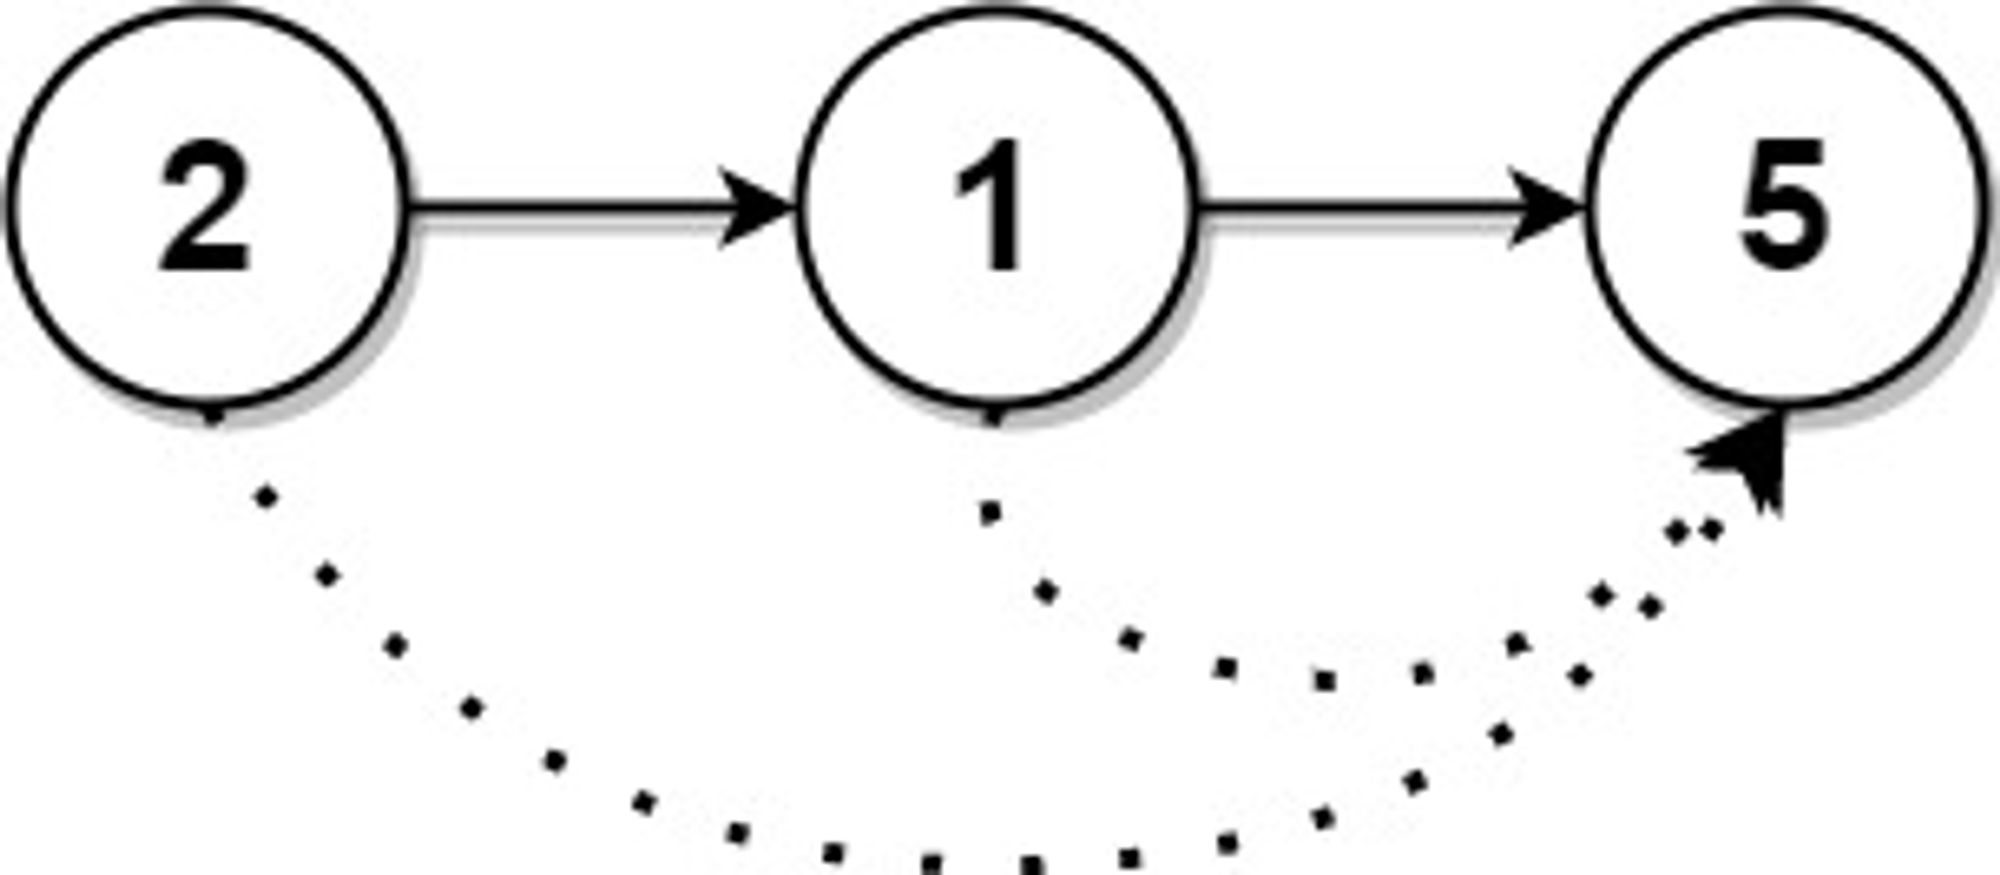

Input: head = [2,1,5]
Output: [5,5,0]

Example 2:
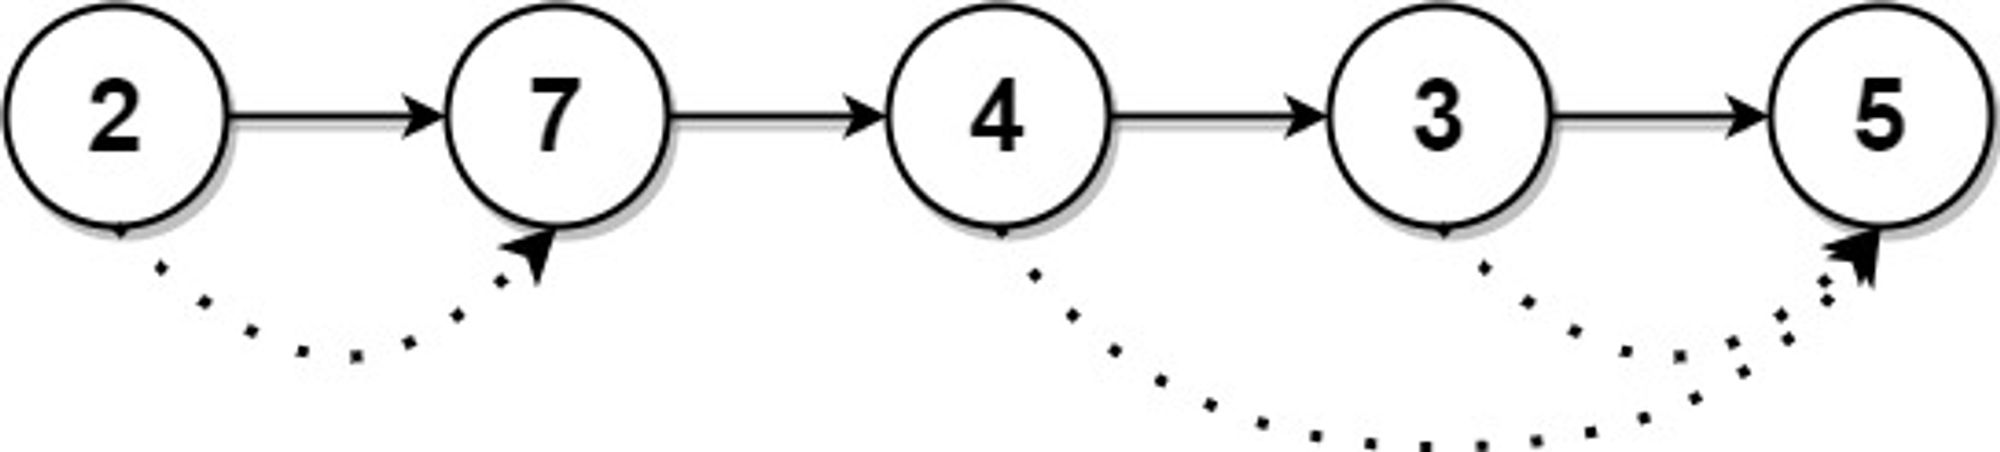

Input: head = [2,7,4,3,5]
Output: [7,0,5,5,0]

**Q8. Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.
After doing so, return the head of the final linked list.  You may return any such answer.
(Note that in the examples below, all sequences are serializations of `ListNode` objects.)**

Example 1:
Input: head = [1,2,-3,3,1]
Output: [3,1]
Note: The answer [1,2,1] would also be accepted.

Example 2:
Input: head = [1,2,3,-3,4]
Output: [1,2,4]

Example 3:
Input: head = [1,2,3,-3,-2]
Output: [1]

In [ ]:
# A Linked List Node
class ListNode:
	def __init__(self, val):
		self.val = val
		self.next = None

# Function to create Node
def getNode(data):
	temp = ListNode(data)
	temp.next = None
	return temp

# Function to print the Linked List
def printList(head):
	while (head.next):
		print(head.val, end=' -> ')
		head = head.next
	print(head.val, end='')

# Function that removes continuous nodes
# whose sum is K
def removeZeroSum(head, K):

	# Root node initialise to 0
	root = ListNode(0)

	# Append at the front of the given
	# Linked List
	root.next = head

	# Map to store the sum and reference
	# of the Node
	umap = dict()

	umap[0] = root

	# To store the sum while traversing
	sum = 0

	# Traversing the Linked List
	while (head != None):

		# Find sum
		sum += head.val

		# If found value with (sum - K)
		if ((sum - K) in umap):

			prev = umap[sum - K]
			start = prev

			# Delete all the node
			# traverse till current node
			aux = sum

			# Update sum
			sum = sum - K

			# Traverse till current head
			while (prev != head):
				prev = prev.next
				aux += prev.val
				if (prev != head):
					umap.remove(aux)

			# Update the start value to
			# the next value of current head
			start.next = head.next

		# If (sum - K) value not found
		else:
			umap[sum] = head

		head = head.next

	# Return the value of updated
	# head node
	return root.next


# Driver Code
if __name__ == '__main__':

	# Create Linked List
	head = getNode(1)
	head.next = getNode(2)
	head.next.next = getNode(-3)
	head.next.next.next = getNode(3)
	head.next.next.next.next = getNode(1)

	# Given sum K
	K = 5

	# Function call to get head node
	# of the updated Linked List
	head = removeZeroSum(head, K)

	# Print the updated Linked List
	if(head != None):
		printList(head)